In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

In [2]:
# create GEKKO model
m = GEKKO()

In [34]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()

nt = 101
tm = np.linspace(0,1,nt)
m.time = tm

distance = 1000

# constants
sm = 39.0 #maximal VO2
e0 = 2200 #starting level of energy
e_crit = 0.15 * e0 #critical level of energy, when sigma decreases
g = 9.81 #gravitational constant

# sigma data to create spline
E_data = np.linspace(0, e0, 1001)
sigma_data = sm * E_data/(e0 * e_crit) + 0.75 * sm * (1 - E_data/(e0 * e_crit))
sigma_data[E_data > e_crit] = sm

# slope data to create spline
x_data = np.linspace(0, distance, 500)
slope_data = np.array(250*[1/18 * np.pi] + 250 * [-1/18 * np.pi])

# Variables
v = m.Var(value=0.0, lb=0.0, ub=10.0)
E = m.Var(value=e0, lb=0.0)
x = m.Var(value=0.0)
t = m.Var(value=0.0, lb=0.0)
sigma = m.Var(value=sm, lb=0)
sigma_max = m.Var()
slope = m.Var(value=slope_data[0])

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# FV
tf = m.FV(value=150.0,lb=0.1,ub=300.0)
tf.STATUS = 1

# MV
u = m.MV(value=0,lb=0,ub=12)
u.STATUS = 1

# energy decrease at the end
m.cspline(E, sigma_max, E_data, sigma_data, True)

# slope
m.cspline(x, slope, x_data, slope_data, True)

# nutrition
nutrition = m.Intermediate((-0.01491*m.atan(-1.801*10**(-6)*(tf*t)**(1.696))+0.000741))

m.Equation(v.dt()==(u - g * m.sin(slope) - v/0.892)*tf)
m.Equation(E.dt()==(sigma - u*v + nutrition)*tf)
m.Equation(x.dt()==(v*m.cos(slope))*tf)
m.Equation(t.dt()==1)
m.Equation(sigma<=sigma_max)

m.Equation((distance-x)*final<=0)

m.Minimize(tf)

m.options.IMODE = 6
m.options.MAX_ITER=1000
m.solve()

print('Final Time: ' + str(tf.value[0]))

tm = tm * tf.value[0]

apm 90.156.80.122_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            2
   Constants    :            0
   Variables    :           12
   Intermediates:            1
   Connections  :            4
   Equations    :            8
   Residuals    :            7
 
 Number of state variables:           1801
 Number of total equations: -         1600
 Number of slack variables: -          200
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  63  2.3412297e+04 1.28e+02 3.45e+10  -0.2 6.06e-01  10.4 4.01e-03 4.01e-03s 18
  64  2.3412225e+04 1.28e+02 3.16e+10  -0.2 2.28e-01  10.8 8.36e-02 8.36e-02s 18
  65  2.3412214e+04 1.28e+02 3.16e+10  -0.2 6.63e-01  10.3 3.27e-04 3.27e-04s 18
  66r 2.3412214e+04 1.28e+02 1.00e+03   1.0 0.00e+00  10.7 0.00e+00 0.00e+00R  1
  67r 2.3446605e+04 1.23e+02 1.06e+03   1.8 5.63e+03    -  9.00e-03 1.94e-03f  1
  68r 2.3282239e+04 1.23e+02 1.04e+03  -5.2 8.63e+02    -  8.40e-03 5.26e-03f  1
  69r 2.3307491e+04 1.20e+02 2.72e+03   2.5 1.68e+02   2.0 3.31e-02 3.17e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70r 2.3367465e+04 1.15e+02 1.40e+04   2.7 3.36e+01   1.5 1.07e-01 5.88e-02f  1
  71r 2.3191678e+04 1.01e+02 2.90e+03   1.6 8.59e+00   1.0 2.21e-01 1.23e-01f  1
  72r 2.3161426e+04 6.17e+01 3.73e+04   1.6 8.28e+00   1.5 6.54e-01 3.84e-01f  1
  73  2.2766621e+04 2.90e+02 9.90e+01   2.6 5.91e+04    -  9.38e-03 3.72e-03f  2
  74  2.2596301e+04 6.51e+03

 165  1.6659086e+04 6.42e+02 6.10e+04  -1.7 5.17e+05    -  3.45e-02 6.58e-03f  1
 166  1.6625693e+04 6.31e+02 5.95e+04  -3.3 5.00e+04    -  3.36e-02 2.00e-02h  1
 167  1.7304052e+04 1.85e+03 7.60e+05  -1.5 6.51e+05    -  3.89e-01 1.32e-01f  1
 168  1.6632192e+04 3.76e+03 3.62e+05  -2.0 8.18e+02  -5.0 4.88e-02 6.48e-01h  1
 169  1.6495689e+04 2.66e+03 2.15e+05  -2.0 8.06e+02  -3.6 5.51e-01 3.02e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  1.6493365e+04 2.61e+03 1.44e+05  -8.0 5.60e+02  -4.1 8.14e-02 1.80e-02h  1
 171  1.6558117e+04 2.42e+03 1.87e+06  -1.4 6.54e+02  -4.6 6.58e-01 6.13e-02f  1
 172  1.6616470e+04 2.15e+03 1.63e+06  -1.6 4.69e+02  -5.1 2.81e-01 1.13e-01h  1
 173  1.6711694e+04 1.47e+03 1.06e+06  -1.6 8.17e+02  -5.5 8.68e-01 3.17e-01h  1
 174  1.6809237e+04 1.36e+03 1.00e+06  -1.7 7.55e+02  -4.2 4.90e-02 6.92e-02h  1
 175  1.6839499e+04 1.25e+03 8.87e+05  -1.7 7.43e+02  -3.8 1.37e-01 8.34e-02h  1
 176  1.7026220e+04 7.66e+02

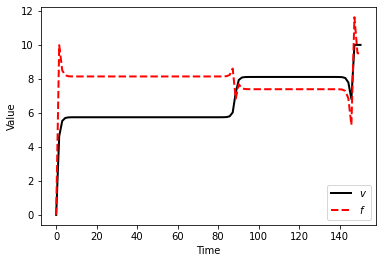

In [35]:
plt.figure(1)
plt.plot(tm,v.value,'k-',lw=2,label=r'$v$')
plt.plot(tm,u.value,'r--',lw=2,label=r'$f$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

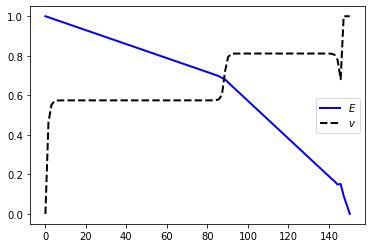

In [36]:
plt.figure(2)
plt.plot(tm,np.array(E.value)/max(E.value),'b-',lw=2,label=r'$E$')
plt.plot(tm,np.array(v.value)/max(v.value),'k--',lw=2,label=r'$v$')
plt.legend()
plt.show()

In [37]:
nutrition.value

[0.000741, 0.0007410535778, 0.0007411735928, 0.0007413452888, 0.0007415624431, 0.00074182117926, 0.00074211874051, 0.00074245301842, 0.00074282232344, 0.00074322525681, 0.00074366063219, 0.00074412742449, 0.00074462473474, 0.00074515176496, 0.00074570779973, 0.00074629219213, 0.00074690435298, 0.0007475437423, 0.00074820986246, 0.00074890225267, 0.00074962048438, 0.00075036415755, 0.00075113289739, 0.00075192635174, 0.00075274418872, 0.00075358609475, 0.00075445177286, 0.00075534094121, 0.00075625333171, 0.00075718868896, 0.00075814676918, 0.00075912733931, 0.0007601301762, 0.00076115506591, 0.00076220180304, 0.00076327019016, 0.00076436003726, 0.00076547116128, 0.00076660338567, 0.00076775654001, 0.00076893045962, 0.00077012498523, 0.00077133996268, 0.00077257524264, 0.00077383068035, 0.00077510613534, 0.00077640147128, 0.00077771655571, 0.00077905125989, 0.00078040545856, 0.00078177902987, 0.00078317185511, 0.00078458381867, 0.00078601480784, 0.00078746471268, 0.00078893342594, 0.000